## Stock Sentiment Analysis

![SENTIMENT ANALYSIS](https://stackabuse.s3.amazonaws.com/media/sentiment-analysis-in-python-with-textblob-1.jpg)

🧰Importing Necessary Libraries

In [324]:
import pandas as pd
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import warnings
import matplotlib.pyplot as plt

# Import Visualization Libraries
import plotly.offline as pyo 
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import seaborn as sns 
from IPython.display import IFrame
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import random 

We read and glimpse the data.

In [325]:
DF = df = pd.read_csv('reddit_stock_sentiment.csv')

We will also look into data quality, for example missing data.

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Author         200 non-null    object 
 1   Created At     200 non-null    float64
 2   Score          200 non-null    int64  
 3   Comment Count  200 non-null    int64  
 4   Title          200 non-null    object 
 5   Selftext       61 non-null     object 
 6   URL            200 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 11.1+ KB


## 🏗️Data Preprocessing

In [327]:
df.head()

Author    Created At  Score  Comment Count  \
0     RandomInvestor98  1.727330e+09  31906           1644   
1  Sad_Nefariousness10  1.722527e+09  29016          11819   
2  Efficient_Deer_8605  1.723558e+09  12336           1351   
3               sco-go  1.722704e+09  14514           1089   
4   Suspicious-Bad4703  1.722820e+09  11757           1014   

                                               Title  \
0  Nancy Pelosi’s husband sold more than $500K wo...   
1         I bought $700k worth of Intel stock today    
2                I bought $700k worth of Intel stock   
3  To the guy who spent his 700k inheritance on I...   
4                       Japanese Stocks are Crashing   

                                            Selftext  \
0                                                NaN   
1  https://preview.redd.it/83gh52szi2gd1.png?widt...   
2  I like the stock and I think it’s really cheap...   
3                                                NaN   
4                                                NaN   

                                                 URL  
0  https://nypost.com/2024/09/24/business/nancy-p...  
1  https://www.reddit.com/r/wallstreetbets/commen...  
2               https://i.redd.it/0e790lxetfid1.jpeg  
3                https://i.redd.it/d0cwjxtcchgd1.png  
4               https://i.redd.it/zde570etxqgd1.jpeg

The whole body of the text was devided into two coloumns, "Selftext" column and "Text", 
so we will concatenate the two of them

In [328]:
# Concatenate two columns into a new column
df['Text'] = df['Title'].fillna('') + ' ' + df['Selftext'].fillna('')

# Drop the original 'Title' and 'Selftext' columns
df = df.drop(['Title', 'Selftext'], axis=1)

#print(df.head())


### Descriptive Statistics about the Data
`.describe()` generates descriptive statistics. include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.

In [329]:
df.describe()

Created At          Score  Comment Count
count  2.000000e+02     200.000000     200.000000
mean   1.683435e+09   18389.195000    1436.540000
std    3.853661e+07   23221.256957    2347.415178
min    1.611955e+09    1311.000000     183.000000
25%    1.654897e+09    3327.500000     568.500000
50%    1.700292e+09    7407.000000     980.500000
75%    1.715863e+09   26371.750000    1686.000000
max    1.727708e+09  117119.000000   29680.000000

> We have only 200 records.

# 📈EDA and Data Visualization


We will use wordclouds to identify the most frequent words in the titles and body of the posts.

In [330]:
!pip install wordcloud

In [331]:
def show_wordcloud(df, title=""):
    text = " ".join(t for t in df.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["stock", "bearish", "bullish", "profit", "loss", "buy", "sell",""])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()


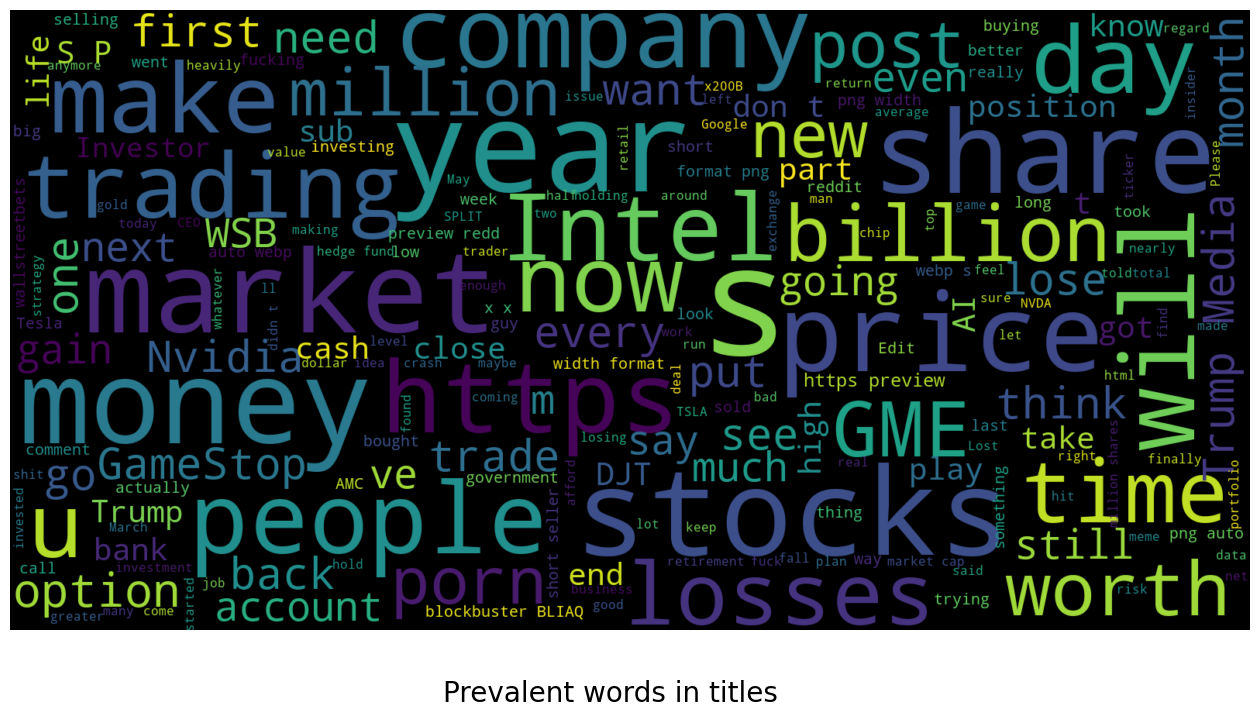

In [332]:
show_wordcloud(df['Text'], title = 'Prevalent words in titles')

## Sentiment Analysis
### NLTK Sentiment Intensity Analyzer

In [333]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91829\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Sentiment Intensity Analyzer:
This analyzer is pre-trained to evaluate the sentiment of a given text using a lexicon and rule-based approach. It can handle social media texts effectively.

In [334]:
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral"  

Displaying the count and percentage distribution of sentiment values

In [335]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='yellow')
    percent.plot(kind='bar', ax=ax2, color='orange')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

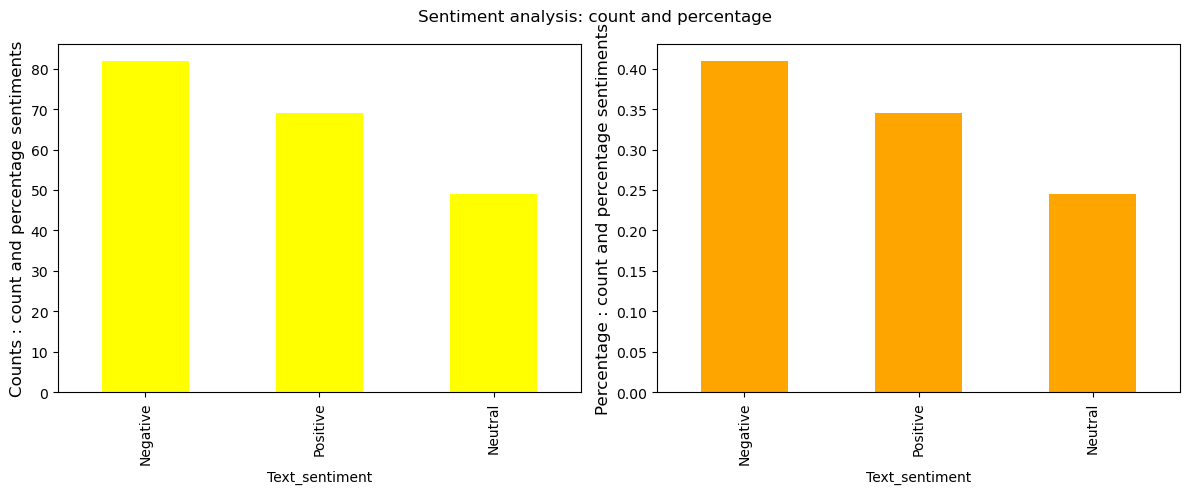

In [336]:
df['Text_sentiment'] = df['Text'].apply(lambda x: find_sentiment(x))        #adding new column to df
plot_sentiment(df, 'Text_sentiment', 'count and percentage')

> 1.  A higher proportion of Negative sentiment often correlates with bearish behavior<br>
> 2.  Positive sentiment, though lower, may indicate that a smaller but notable group of people are optimistic or bullish about specific stocks.<br>
> 3.  Neutral sentiment indicate that the market is not showing clear directional signals based on this dataset.

### Most prevalent words in each of the POSITIVE, NEGATIVE and NEUTRAL sentiments of Text 

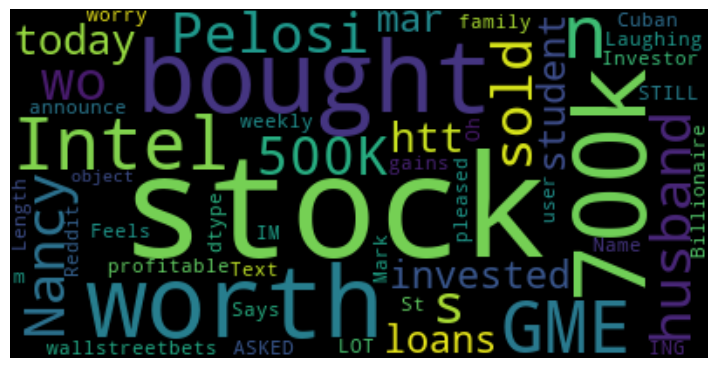

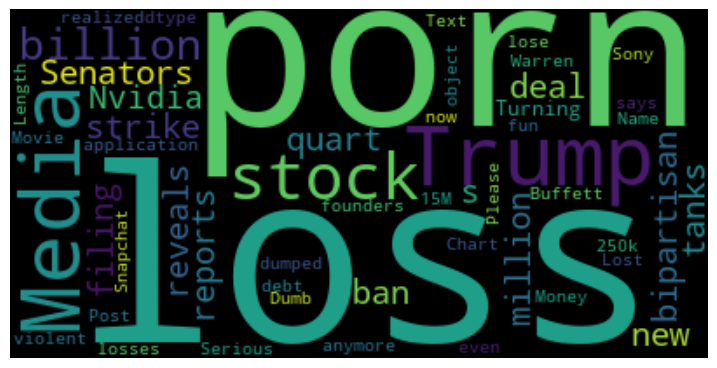

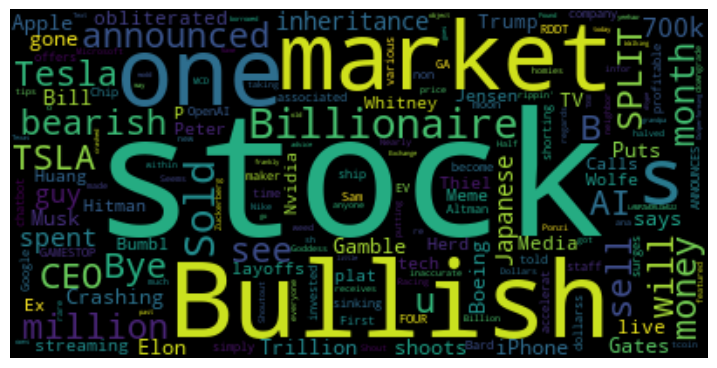

In [337]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def show_wordcloud(data, title=None):
    wordcloud = WordCloud(background_color='black', max_words=200).generate(str(data))
    plt.figure(figsize=(9, 6))  # Smaller plot size
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    #plt.title( 'Prevalent words in titles (Positive sentiment)', size=15)
    plt.show()


show_wordcloud(df.loc[df['Text_sentiment']=='Positive', 'Text'], title = 'Prevalent words in body (Positive sentiment)')
show_wordcloud(df.loc[df['Text_sentiment']=='Negative', 'Text'], title = 'Prevalent words in body (Negative sentiment)')
show_wordcloud(df.loc[df['Text_sentiment']=='Neutral', 'Text'], title = 'Prevalent words in body (Neutal sentiment)')



In [338]:
df['Text_sentiment'].value_counts()

Text_sentiment
Negative    82
Positive    69
Neutral     49
Name: count, dtype: int64

> There is heighest of negative sentiments followed by positive and then neutral sentiments

Checking the average number of comments on the posts in the dataset

In [339]:
df['Comment Count'].sum()/df.shape[0]

1436.54

The distribution of the number of comments on posts.

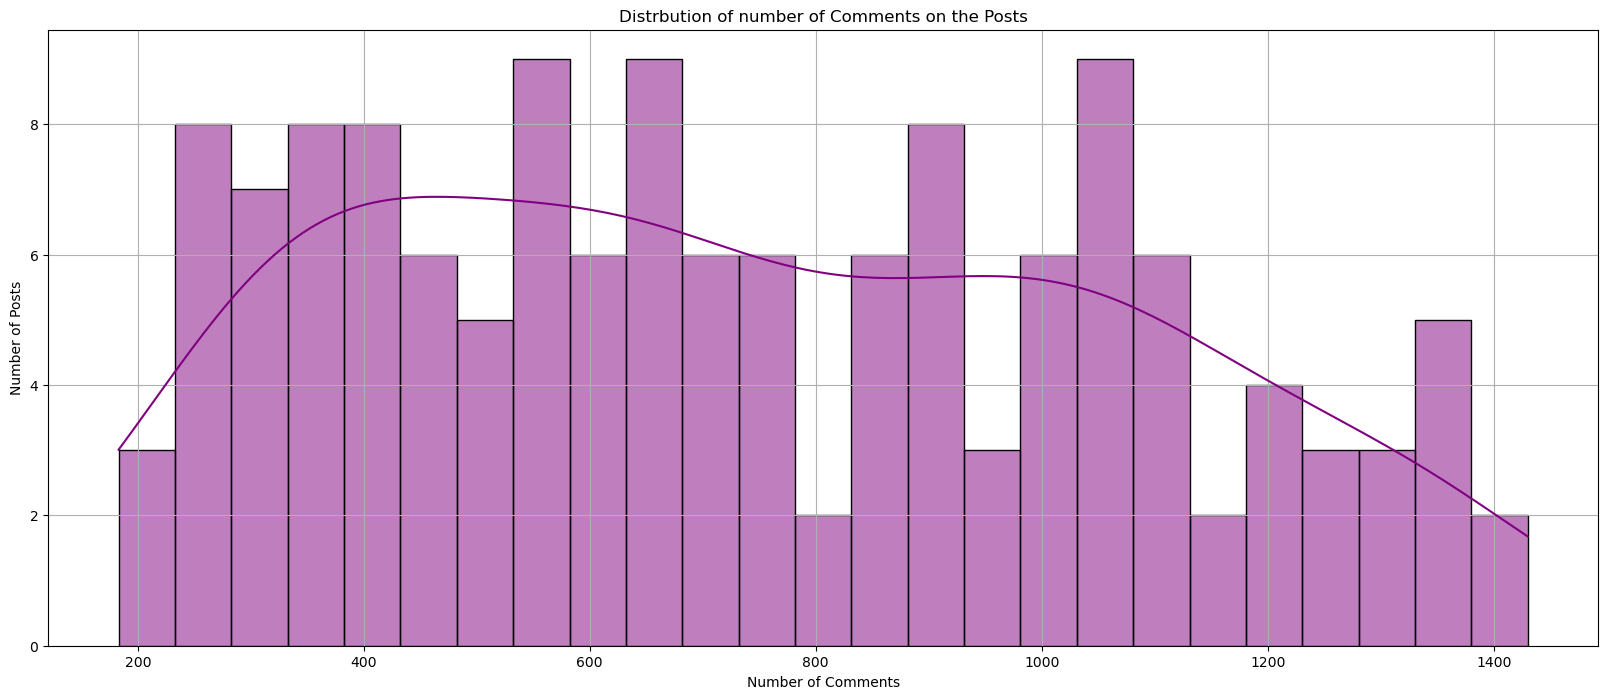

In [340]:
import seaborn as sns
plt.figure(figsize=(20,8))
sns.histplot(df[df['Comment Count'] < 1437]['Comment Count'], kde=True ,  binwidth=50 , color="purple")
#Add a kernel density estimate to smooth the histogram, providing complementary information about the shape of the distribution:

plt.grid()
plt.title("Distrbution of number of Comments on the Posts")
plt.ylabel("Number of Posts")
plt.xlabel("Number of Comments")

plt.show()

> 1. Most posts receive between 400-1000 comments, indicating high interaction.<br>
> 2. A right-skewed distribution suggests some posts gather more than 1200 comments.<br>
> 3. The distribution has multiple engagement clusters (multi-modal).

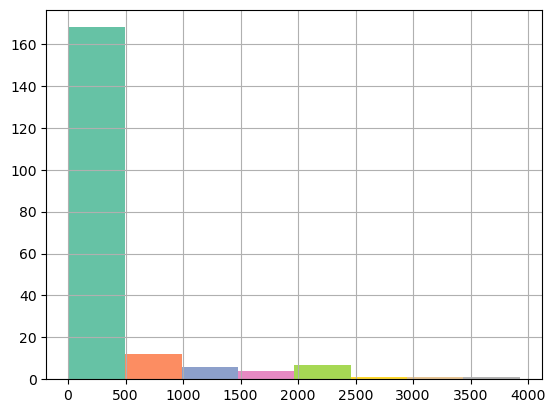

In [341]:
ax = plt.hist(df['Text'].str.len(), bins=8) 
colors = sns.color_palette("Set2", len(ax[2]))
for patch, color in zip(plt.gca().patches, colors):
    patch.set_facecolor(color)
plt.grid(True)
plt.show()

> 1. Most of the text entries have lengths under 500 characters<br>

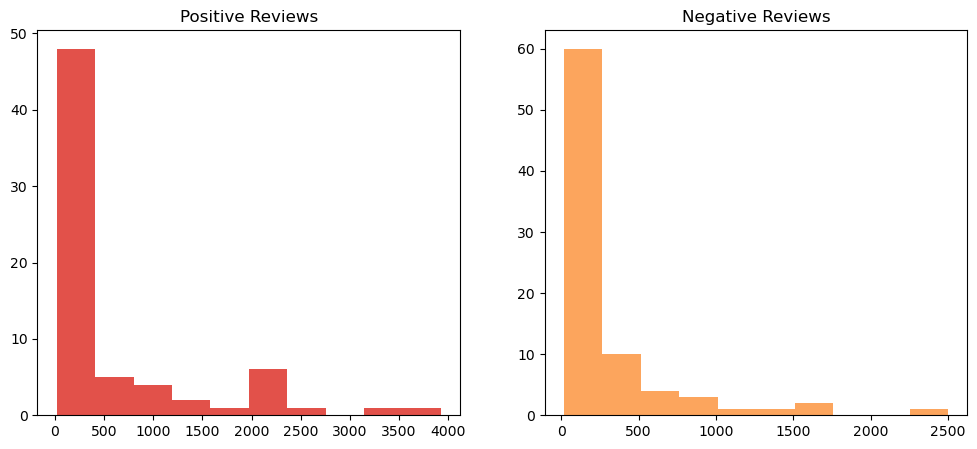

In [342]:
colors = sns.color_palette("Spectral", as_cmap=False)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
ax1.hist(df[df['Text_sentiment']=='Positive']['Text'].str.len(), color=colors[0])
ax1.set_title( 'Positive Reviews')
ax2.hist(df[df['Text_sentiment']=='Negative']['Text'].str.len(), color=colors[1])
ax2.set_title( 'Negative Reviews')
plt.show()

### cleaning data

In [343]:
import re
import string

def cleaning(Text):        
    # converting to lowercase, removing URL links, special characters, punctuations...
    Text = Text.lower() # converting to lowercase
    Text = re.sub('https?://\S+|www\.\S+', '', Text) # removing URL links
    Text = re.sub(r"\b\d+\b", "", Text) # removing number 
    Text = re.sub('<.*?>+', '', Text) # removing special characters, 
    Text = re.sub('[%s]' % re.escape(string.punctuation), '', Text) # punctuations
    Text = re.sub('\n', '',Text)
    Text = re.sub('[’“”…]', '', Text)
     
    return Text

<>:7: SyntaxWarning:

invalid escape sequence '\S'

<>:7: SyntaxWarning:

invalid escape sequence '\S'

C:\Users\91829\AppData\Local\Temp\ipykernel_40600\934339352.py:7: SyntaxWarning:

invalid escape sequence '\S'



In [344]:
ddf = df['Text'].apply(cleaning)

In [345]:
ddf = pd.DataFrame(ddf)  
ddf['Text_sentiment']=df['Text_sentiment']
ddf

Text Text_sentiment
0    nancy pelosis husband sold more than 500k wort...       Positive
1    i bought 700k worth of intel stock today  tldr...       Positive
2    i bought 700k worth of intel stock i like the ...       Positive
3    to the guy who spent his 700k inheritance on i...        Neutral
4                        japanese stocks are crashing         Neutral
..                                                 ...            ...
195  snapchat founders lose billions after violent ...       Negative
196       txse texas stock exchange announced yeehaw          Neutral
197  billionaire investor mark cuban says reddit st...       Positive
198  dumb money movie lost 15m  sony please post yo...       Negative
199  gme and  stocks why to not worry  oh my god gm...       Positive

[200 rows x 2 columns]

In [346]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91829\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [347]:
ddf['cleaned_text'] = ddf['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [348]:
ddf

Text Text_sentiment  \
0    nancy pelosis husband sold more than 500k wort...       Positive   
1    i bought 700k worth of intel stock today  tldr...       Positive   
2    i bought 700k worth of intel stock i like the ...       Positive   
3    to the guy who spent his 700k inheritance on i...        Neutral   
4                        japanese stocks are crashing         Neutral   
..                                                 ...            ...   
195  snapchat founders lose billions after violent ...       Negative   
196       txse texas stock exchange announced yeehaw          Neutral   
197  billionaire investor mark cuban says reddit st...       Positive   
198  dumb money movie lost 15m  sony please post yo...       Negative   
199  gme and  stocks why to not worry  oh my god gm...       Positive   

                                          cleaned_text  
0    nancy pelosis husband sold 500k worth visa sto...  
1    bought 700k worth intel stock today tldr grand...  
2         bought 700k worth intel stock stock cheap rn  
3             guy spent 700k inheritance intel bullish  
4                             japanese stocks crashing  
..                                                 ...  
195  snapchat founders lose billions violent stock ...  
196         txse texas stock exchange announced yeehaw  
197  billionaire investor mark cuban reddit stock t...  
198  dumb money movie lost 15m sony post losses wsb...  
199  gme stocks worry god gme cents hedgies cover s...  

[200 rows x 3 columns]

In [349]:
#Working with the most Frequent Words: 
from collections import Counter
cnt = Counter()
for text in ddf["cleaned_text"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp.style.background_gradient(cmap='Purples')


### removing the most frequent words

In [350]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
ddf["cc_text"] = ddf["cleaned_text"].apply(lambda text: remove_freqwords(text))
ddf.head()

Text Text_sentiment  \
0  nancy pelosis husband sold more than 500k wort...       Positive   
1  i bought 700k worth of intel stock today  tldr...       Positive   
2  i bought 700k worth of intel stock i like the ...       Positive   
3  to the guy who spent his 700k inheritance on i...        Neutral   
4                      japanese stocks are crashing         Neutral   

                                        cleaned_text  \
0  nancy pelosis husband sold 500k worth visa sto...   
1  bought 700k worth intel stock today tldr grand...   
2       bought 700k worth intel stock stock cheap rn   
3           guy spent 700k inheritance intel bullish   
4                           japanese stocks crashing   

                                             cc_text  
0  nancy pelosis husband sold 500k worth visa — w...  
1  bought 700k worth today tldr grandma died mont...  
2                         bought 700k worth cheap rn  
3                 guy spent 700k inheritance bullish  
4                                  japanese crashing

In [351]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91829\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

<u>Lemmatization:</u> Lemmatization is converting the word to its base form or lemma by removing affixes from the inflected words. 
It helps to create better features for machine learning and NLP models hence it is an important preprocessing step.

In [352]:
from nltk.stem import WordNetLemmatizer
wordnet_lem = WordNetLemmatizer()

ddf['lemma_cleaned_text'] = ddf['cc_text'].apply(wordnet_lem.lemmatize)
ddf

Text Text_sentiment  \
0    nancy pelosis husband sold more than 500k wort...       Positive   
1    i bought 700k worth of intel stock today  tldr...       Positive   
2    i bought 700k worth of intel stock i like the ...       Positive   
3    to the guy who spent his 700k inheritance on i...        Neutral   
4                        japanese stocks are crashing         Neutral   
..                                                 ...            ...   
195  snapchat founders lose billions after violent ...       Negative   
196       txse texas stock exchange announced yeehaw          Neutral   
197  billionaire investor mark cuban says reddit st...       Positive   
198  dumb money movie lost 15m  sony please post yo...       Negative   
199  gme and  stocks why to not worry  oh my god gm...       Positive   

                                          cleaned_text  \
0    nancy pelosis husband sold 500k worth visa sto...   
1    bought 700k worth intel stock today tldr grand...   
2         bought 700k worth intel stock stock cheap rn   
3             guy spent 700k inheritance intel bullish   
4                             japanese stocks crashing   
..                                                 ...   
195  snapchat founders lose billions violent stock ...   
196         txse texas stock exchange announced yeehaw   
197  billionaire investor mark cuban reddit stock t...   
198  dumb money movie lost 15m sony post losses wsb...   
199  gme stocks worry god gme cents hedgies cover s...   

                                               cc_text  \
0    nancy pelosis husband sold 500k worth visa — w...   
1    bought 700k worth today tldr grandma died mont...   
2                           bought 700k worth cheap rn   
3                   guy spent 700k inheritance bullish   
4                                    japanese crashing   
..                                                 ...   
195      snapchat founders lose billions violent crash   
196               txse texas exchange announced yeehaw   
197  billionaire investor mark cuban reddit traders...   
198  dumb movie lost 15m sony post losses wsb surpr...   
199  gme worry god gme cents hedgies cover shorts 3...   

                                    lemma_cleaned_text  
0    nancy pelosis husband sold 500k worth visa — w...  
1    bought 700k worth today tldr grandma died mont...  
2                           bought 700k worth cheap rn  
3                   guy spent 700k inheritance bullish  
4                                    japanese crashing  
..                                                 ...  
195      snapchat founders lose billions violent crash  
196               txse texas exchange announced yeehaw  
197  billionaire investor mark cuban reddit traders...  
198  dumb movie lost 15m sony post losses wsb surpr...  
199  gme worry god gme cents hedgies cover shorts 3...  

[200 rows x 5 columns]

In [353]:
df

Author    Created At  Score  Comment Count  \
0        RandomInvestor98  1.727330e+09  31906           1644   
1     Sad_Nefariousness10  1.722527e+09  29016          11819   
2     Efficient_Deer_8605  1.723558e+09  12336           1351   
3                  sco-go  1.722704e+09  14514           1089   
4      Suspicious-Bad4703  1.722820e+09  11757           1014   
..                    ...           ...    ...            ...   
195      AtmosphereNo6743  1.707342e+09   3667            277   
196              Noobmode  1.717642e+09   1582            405   
197             superanth  1.612206e+09  98626           1377   
198  B3stAuD1t0rofA11tiME  1.697384e+09   3214            515   
199              Slyver12  1.612322e+09  28096           2124   

                                                   URL  \
0    https://nypost.com/2024/09/24/business/nancy-p...   
1    https://www.reddit.com/r/wallstreetbets/commen...   
2                 https://i.redd.it/0e790lxetfid1.jpeg   
3                  https://i.redd.it/d0cwjxtcchgd1.png   
4                 https://i.redd.it/zde570etxqgd1.jpeg   
..                                                 ...   
195  https://www.forbes.com.au/news/investing/snapc...   
196               https://i.redd.it/6m77017m7v4d1.jpeg   
197  https://www.unilad.co.uk/news/billionaire-inve...   
198  https://www.reddit.com/r/wallstreetbets/commen...   
199  https://www.reddit.com/r/wallstreetbets/commen...   

                                                  Text Text_sentiment  
0    Nancy Pelosi’s husband sold more than $500K wo...       Positive  
1    I bought $700k worth of Intel stock today  htt...       Positive  
2    I bought $700k worth of Intel stock I like the...       Positive  
3    To the guy who spent his 700k inheritance on I...        Neutral  
4                        Japanese Stocks are Crashing         Neutral  
..                                                 ...            ...  
195  Snapchat founders lose billions after 'violent...       Negative  
196   TXSE (Texas Stock Exchange) announced, yeehaw.          Neutral  
197  Billionaire Investor Mark Cuban Says Reddit St...       Positive  
198  Dumb Money Movie Lost $15M - Sony Please Post ...       Negative  
199  GME and $80 Stocks. Why to not worry.  \n\n>Oh...       Positive  

[200 rows x 7 columns]

In [354]:
import pandas as pd

# Assuming your dataframes are named df and ddf
the_df = merged_df = pd.merge(df, ddf, left_index=True, right_index=True, how='inner')

print(the_df)

                   Author    Created At  Score  Comment Count  \
0        RandomInvestor98  1.727330e+09  31906           1644   
1     Sad_Nefariousness10  1.722527e+09  29016          11819   
2     Efficient_Deer_8605  1.723558e+09  12336           1351   
3                  sco-go  1.722704e+09  14514           1089   
4      Suspicious-Bad4703  1.722820e+09  11757           1014   
..                    ...           ...    ...            ...   
195      AtmosphereNo6743  1.707342e+09   3667            277   
196              Noobmode  1.717642e+09   1582            405   
197             superanth  1.612206e+09  98626           1377   
198  B3stAuD1t0rofA11tiME  1.697384e+09   3214            515   
199              Slyver12  1.612322e+09  28096           2124   

                                                   URL  \
0    https://nypost.com/2024/09/24/business/nancy-p...   
1    https://www.reddit.com/r/wallstreetbets/commen...   
2                 https://i.redd.it/0e790lxet

In [355]:
the_df

Author    Created At  Score  Comment Count  \
0        RandomInvestor98  1.727330e+09  31906           1644   
1     Sad_Nefariousness10  1.722527e+09  29016          11819   
2     Efficient_Deer_8605  1.723558e+09  12336           1351   
3                  sco-go  1.722704e+09  14514           1089   
4      Suspicious-Bad4703  1.722820e+09  11757           1014   
..                    ...           ...    ...            ...   
195      AtmosphereNo6743  1.707342e+09   3667            277   
196              Noobmode  1.717642e+09   1582            405   
197             superanth  1.612206e+09  98626           1377   
198  B3stAuD1t0rofA11tiME  1.697384e+09   3214            515   
199              Slyver12  1.612322e+09  28096           2124   

                                                   URL  \
0    https://nypost.com/2024/09/24/business/nancy-p...   
1    https://www.reddit.com/r/wallstreetbets/commen...   
2                 https://i.redd.it/0e790lxetfid1.jpeg   
3                  https://i.redd.it/d0cwjxtcchgd1.png   
4                 https://i.redd.it/zde570etxqgd1.jpeg   
..                                                 ...   
195  https://www.forbes.com.au/news/investing/snapc...   
196               https://i.redd.it/6m77017m7v4d1.jpeg   
197  https://www.unilad.co.uk/news/billionaire-inve...   
198  https://www.reddit.com/r/wallstreetbets/commen...   
199  https://www.reddit.com/r/wallstreetbets/commen...   

                                                Text_x Text_sentiment_x  \
0    Nancy Pelosi’s husband sold more than $500K wo...         Positive   
1    I bought $700k worth of Intel stock today  htt...         Positive   
2    I bought $700k worth of Intel stock I like the...         Positive   
3    To the guy who spent his 700k inheritance on I...          Neutral   
4                        Japanese Stocks are Crashing           Neutral   
..                                                 ...              ...   
195  Snapchat founders lose billions after 'violent...         Negative   
196   TXSE (Texas Stock Exchange) announced, yeehaw.            Neutral   
197  Billionaire Investor Mark Cuban Says Reddit St...         Positive   
198  Dumb Money Movie Lost $15M - Sony Please Post ...         Negative   
199  GME and $80 Stocks. Why to not worry.  \n\n>Oh...         Positive   

                                                Text_y Text_sentiment_y  \
0    nancy pelosis husband sold more than 500k wort...         Positive   
1    i bought 700k worth of intel stock today  tldr...         Positive   
2    i bought 700k worth of intel stock i like the ...         Positive   
3    to the guy who spent his 700k inheritance on i...          Neutral   
4                        japanese stocks are crashing           Neutral   
..                                                 ...              ...   
195  snapchat founders lose billions after violent ...         Negative   
196       txse texas stock exchange announced yeehaw            Neutral   
197  billionaire investor mark cuban says reddit st...         Positive   
198  dumb money movie lost 15m  sony please post yo...         Negative   
199  gme and  stocks why to not worry  oh my god gm...         Positive   

                                          cleaned_text  \
0    nancy pelosis husband sold 500k worth visa sto...   
1    bought 700k worth intel stock today tldr grand...   
2         bought 700k worth intel stock stock cheap rn   
3             guy spent 700k inheritance intel bullish   
4                             japanese stocks crashing   
..                                                 ...   
195  snapchat founders lose billions violent stock ...   
196         txse texas stock exchange announced yeehaw   
197  billionaire investor mark cuban reddit stock t...   
198  dumb money movie lost 15m sony post losses wsb...   
199  gme stocks worry god gme cents hedgies cover s...   

                                          

In [356]:
# corr=train_df.groupby('SecuritiesCode')[['Target','Close']].corr().unstack().iloc[:,1]
# stocks=corr.nlargest(10).rename("Return").reset_index()
# stocks=stocks.merge(train_df[['Name','SecuritiesCode']], on='SecuritiesCode').drop_duplicates()
# pal=sns.color_palette("magma_r", 14).as_hex()
# rgb=['rgba'+str(matplotlib.colors.to_rgba(i,0.7)) for i in pal]

# fig = go.Figure()
# fig.add_trace(go.Bar(x=stocks.Name, y=stocks.Return, text=stocks.Return, 
#                      texttemplate='%{text:.2f}', name='', width=0.8,
#                      textposition='outside',marker=dict(color=rgb, line=dict(color=pal,width=1)),
#                      hovertemplate='Correlation of %{x} with target = %{y:.3f}'))
# fig.update_layout(template=temp, title='Most Correlated Stocks with Target Variable',
#                   yaxis=dict(title='Correlation',showticklabels=False), 
#                   xaxis=dict(title='Stock',tickangle=45), margin=dict(b=100),
#                   width=800,height=500)
# fig.show()

In [357]:
the_df = the_df.drop(columns='Text_y' , axis=1)
the_df = the_df.drop(columns='Text_sentiment_y' , axis=1)
the_df = the_df.drop(columns='URL' , axis=1)

In [358]:
the_df

Author    Created At  Score  Comment Count  \
0        RandomInvestor98  1.727330e+09  31906           1644   
1     Sad_Nefariousness10  1.722527e+09  29016          11819   
2     Efficient_Deer_8605  1.723558e+09  12336           1351   
3                  sco-go  1.722704e+09  14514           1089   
4      Suspicious-Bad4703  1.722820e+09  11757           1014   
..                    ...           ...    ...            ...   
195      AtmosphereNo6743  1.707342e+09   3667            277   
196              Noobmode  1.717642e+09   1582            405   
197             superanth  1.612206e+09  98626           1377   
198  B3stAuD1t0rofA11tiME  1.697384e+09   3214            515   
199              Slyver12  1.612322e+09  28096           2124   

                                                Text_x Text_sentiment_x  \
0    Nancy Pelosi’s husband sold more than $500K wo...         Positive   
1    I bought $700k worth of Intel stock today  htt...         Positive   
2    I bought $700k worth of Intel stock I like the...         Positive   
3    To the guy who spent his 700k inheritance on I...          Neutral   
4                        Japanese Stocks are Crashing           Neutral   
..                                                 ...              ...   
195  Snapchat founders lose billions after 'violent...         Negative   
196   TXSE (Texas Stock Exchange) announced, yeehaw.            Neutral   
197  Billionaire Investor Mark Cuban Says Reddit St...         Positive   
198  Dumb Money Movie Lost $15M - Sony Please Post ...         Negative   
199  GME and $80 Stocks. Why to not worry.  \n\n>Oh...         Positive   

                                          cleaned_text  \
0    nancy pelosis husband sold 500k worth visa sto...   
1    bought 700k worth intel stock today tldr grand...   
2         bought 700k worth intel stock stock cheap rn   
3             guy spent 700k inheritance intel bullish   
4                             japanese stocks crashing   
..                                                 ...   
195  snapchat founders lose billions violent stock ...   
196         txse texas stock exchange announced yeehaw   
197  billionaire investor mark cuban reddit stock t...   
198  dumb money movie lost 15m sony post losses wsb...   
199  gme stocks worry god gme cents hedgies cover s...   

                                               cc_text  \
0    nancy pelosis husband sold 500k worth visa — w...   
1    bought 700k worth today tldr grandma died mont...   
2                           bought 700k worth cheap rn   
3                   guy spent 700k inheritance bullish   
4                                    japanese crashing   
..                                                 ...   
195      snapchat founders lose billions violent crash   
196               txse texas exchange announced yeehaw   
197  billionaire investor mark cuban reddit traders...   
198  dumb movie lost 15m sony post losses wsb surpr...   
199  gme worry god gme cents hedgies cover shorts 3...   

                                    lemma_cleaned_text  
0    nancy pelosis husband sold 500k worth visa — w...  
1    bought 700k worth today tldr grandma died mont...  
2                           bought 700k worth cheap rn  
3                   guy spent 700k inheritance bullish  
4                                    japanese crashing  
..                                                 ...  
195      snapchat founders lose billions violent crash  
196               txse texas exchange announced yeehaw  
197  billionaire investor mark cuban reddit traders...  
198  dumb movie lost 15m sony post losses wsb surpr...  
199  gme worry god gme cents hedgies cover shorts 3...  

[200 rows x 9 columns]

now the data is perfectly clean

###  Extracting DATE from Unix time stamp

In [359]:
import pandas as pd
from datetime import datetime 

def convert_and_merge_timestamps(the_df):
    # Convert 'Created At' column to timestamps and then to datetime
    timestamps = the_df['Created At'].values
    
    # Create conversion results
    dates = [datetime.fromtimestamp(ts) for ts in timestamps]
    
    # Create a temporary DataFrame with converted dates
    date_df = pd.DataFrame({
        'Created At': timestamps,  # Keep original for merging
        'Date': [d.strftime('%Y-%m-%d') for d in dates],
        'Time': [d.strftime('%H:%M:%S') for d in dates],
        'Full Datetime': [d.strftime('%Y-%m-%d %H:%M:%S') for d in dates]
    })
    
    # Merge with original DataFrame
    df_merged = the_df.merge(date_df, on='Created At', how='left')
    
    return df_merged

# Apply the conversion and merge
df_with_dates = convert_and_merge_timestamps(the_df)

### extracting imp infromation from date and time

In [360]:
import datetime as dt
year = []
month = []
day = []
hour = []
date = []
for i in range(len(df_with_dates)):
    datestamp = dt.datetime.strptime(df_with_dates.loc[(i,'Full Datetime')], '%Y-%m-%d %H:%M:%S')
    year.append(datestamp.date().year)
    month.append(datestamp.date().month)
    day.append(datestamp.date().day)
    hour.append(datestamp.time().hour)
    date.append(datestamp.date())

In [361]:
# Append the date information to our dataframe
the_df['year'] = year
the_df['month'] = month
the_df['day'] = day
the_df['hour'] = hour
the_df['date'] = date

In [362]:
the_df = the_df.drop(columns="Created At" , axis= 1)
#df = df.drop(columns="URL" , axis= 1)


In [363]:
the_df

Author  Score  Comment Count  \
0        RandomInvestor98  31906           1644   
1     Sad_Nefariousness10  29016          11819   
2     Efficient_Deer_8605  12336           1351   
3                  sco-go  14514           1089   
4      Suspicious-Bad4703  11757           1014   
..                    ...    ...            ...   
195      AtmosphereNo6743   3667            277   
196              Noobmode   1582            405   
197             superanth  98626           1377   
198  B3stAuD1t0rofA11tiME   3214            515   
199              Slyver12  28096           2124   

                                                Text_x Text_sentiment_x  \
0    Nancy Pelosi’s husband sold more than $500K wo...         Positive   
1    I bought $700k worth of Intel stock today  htt...         Positive   
2    I bought $700k worth of Intel stock I like the...         Positive   
3    To the guy who spent his 700k inheritance on I...          Neutral   
4                        Japanese Stocks are Crashing           Neutral   
..                                                 ...              ...   
195  Snapchat founders lose billions after 'violent...         Negative   
196   TXSE (Texas Stock Exchange) announced, yeehaw.            Neutral   
197  Billionaire Investor Mark Cuban Says Reddit St...         Positive   
198  Dumb Money Movie Lost $15M - Sony Please Post ...         Negative   
199  GME and $80 Stocks. Why to not worry.  \n\n>Oh...         Positive   

                                          cleaned_text  \
0    nancy pelosis husband sold 500k worth visa sto...   
1    bought 700k worth intel stock today tldr grand...   
2         bought 700k worth intel stock stock cheap rn   
3             guy spent 700k inheritance intel bullish   
4                             japanese stocks crashing   
..                                                 ...   
195  snapchat founders lose billions violent stock ...   
196         txse texas stock exchange announced yeehaw   
197  billionaire investor mark cuban reddit stock t...   
198  dumb money movie lost 15m sony post losses wsb...   
199  gme stocks worry god gme cents hedgies cover s...   

                                               cc_text  \
0    nancy pelosis husband sold 500k worth visa — w...   
1    bought 700k worth today tldr grandma died mont...   
2                           bought 700k worth cheap rn   
3                   guy spent 700k inheritance bullish   
4                                    japanese crashing   
..                                                 ...   
195      snapchat founders lose billions violent crash   
196               txse texas exchange announced yeehaw   
197  billionaire investor mark cuban reddit traders...   
198  dumb movie lost 15m sony post losses wsb surpr...   
199  gme worry god gme cents hedgies cover shorts 3...   

                                    lemma_cleaned_text  year  month  day  \
0    nancy pelosis husband sold 500k worth visa — w...  2024      9   26   
1    bought 700k worth today tldr grandma died mont...  2024      8    1   
2                           bought 700k worth cheap rn  2024      8   13   
3                   guy spent 700k inheritance bullish  2024      8    3   
4                                    japanese crashing  2024      8    5   
..                                                 ...   ...    ...  ...   
195      snapchat founders lose billions violent crash  2024      2    8   
196               txse texas exchange announced yeehaw  2024      6    6   
197  billionaire investor mark cuban reddit traders...  2021      2    2   
198  dumb movie lost 15m sony post losses wsb surpr...  2023     10   15   
199  gme worry god gme cents hedgies cover shorts 3...  2021      2    3   

     hour        date  
0      11  2024-09-26  
1      21  2024-08-01  
2      19  2024-08-13  
3      22  2024-08-03  
4       6  2024-08-05  
..    ...         ...  
195     3  2024-02-08  
196   

C:\Users\91829\AppData\Local\Temp\ipykernel_40600\863470593.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




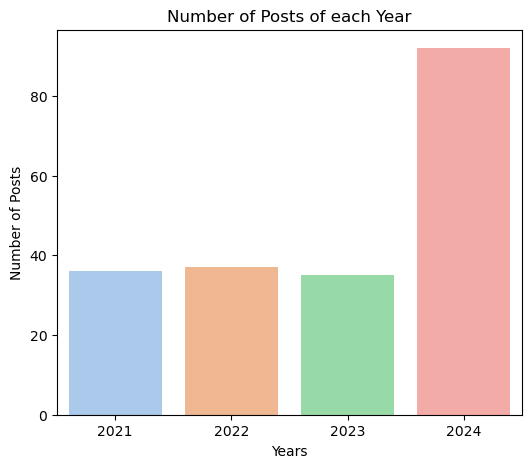

In [364]:
plt.figure(figsize=(6,5))
sns.countplot(x='year', data=the_df, palette="pastel")
# sns.color_palette("pastel")
plt.title("Number of Posts of each Year")
plt.xlabel('Years')
plt.ylabel("Number of Posts")
plt.show()

Showing top 15 posts having highest number of comments

In [365]:
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap
data_score = the_df.sort_values('Comment Count', ascending=False).head(15)
# Wrap long text titles for y-axis
data_score['wrapped_text'] = data_score['lemma_cleaned_text'].apply(lambda x: '\n'.join(textwrap.wrap(x, width=10)))
plt.figure(figsize=(10, 50))
plt.subplots_adjust(left=-5) 
plt.title("Posts with Highest Number of Comments", fontsize=16)
sns.barplot(y=data_score['lemma_cleaned_text'], x=data_score['Comment Count'], palette="viridis")
plt.xlabel('Score', fontsize=12)
plt.ylabel("Post's Title", fontsize=20)
plt.yticks(fontsize=10)
plt.show()


C:\Users\91829\AppData\Local\Temp\ipykernel_40600\842661484.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\91829\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from current font.

C:\Users\91829\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 129421 (\N{GORILLA}) missing from current font.

C:\Users\91829\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128142 (\N{GEM STONE}) missing from current font.

C:\Users\91829\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.

C:\Users\91829\AppData\Roaming\Python\Pyt

Shwoing top 15 posts having highest score

C:\Users\91829\AppData\Local\Temp\ipykernel_40600\1546571011.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\91829\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 129421 (\N{GORILLA}) missing from current font.

C:\Users\91829\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128142 (\N{GEM STONE}) missing from current font.

C:\Users\91829\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.

C:\Users\91829\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128640 (\N{ROCKET}) missing from current font.

C:\Users\91829\AppData\Roaming\Python\Python312\site-packages

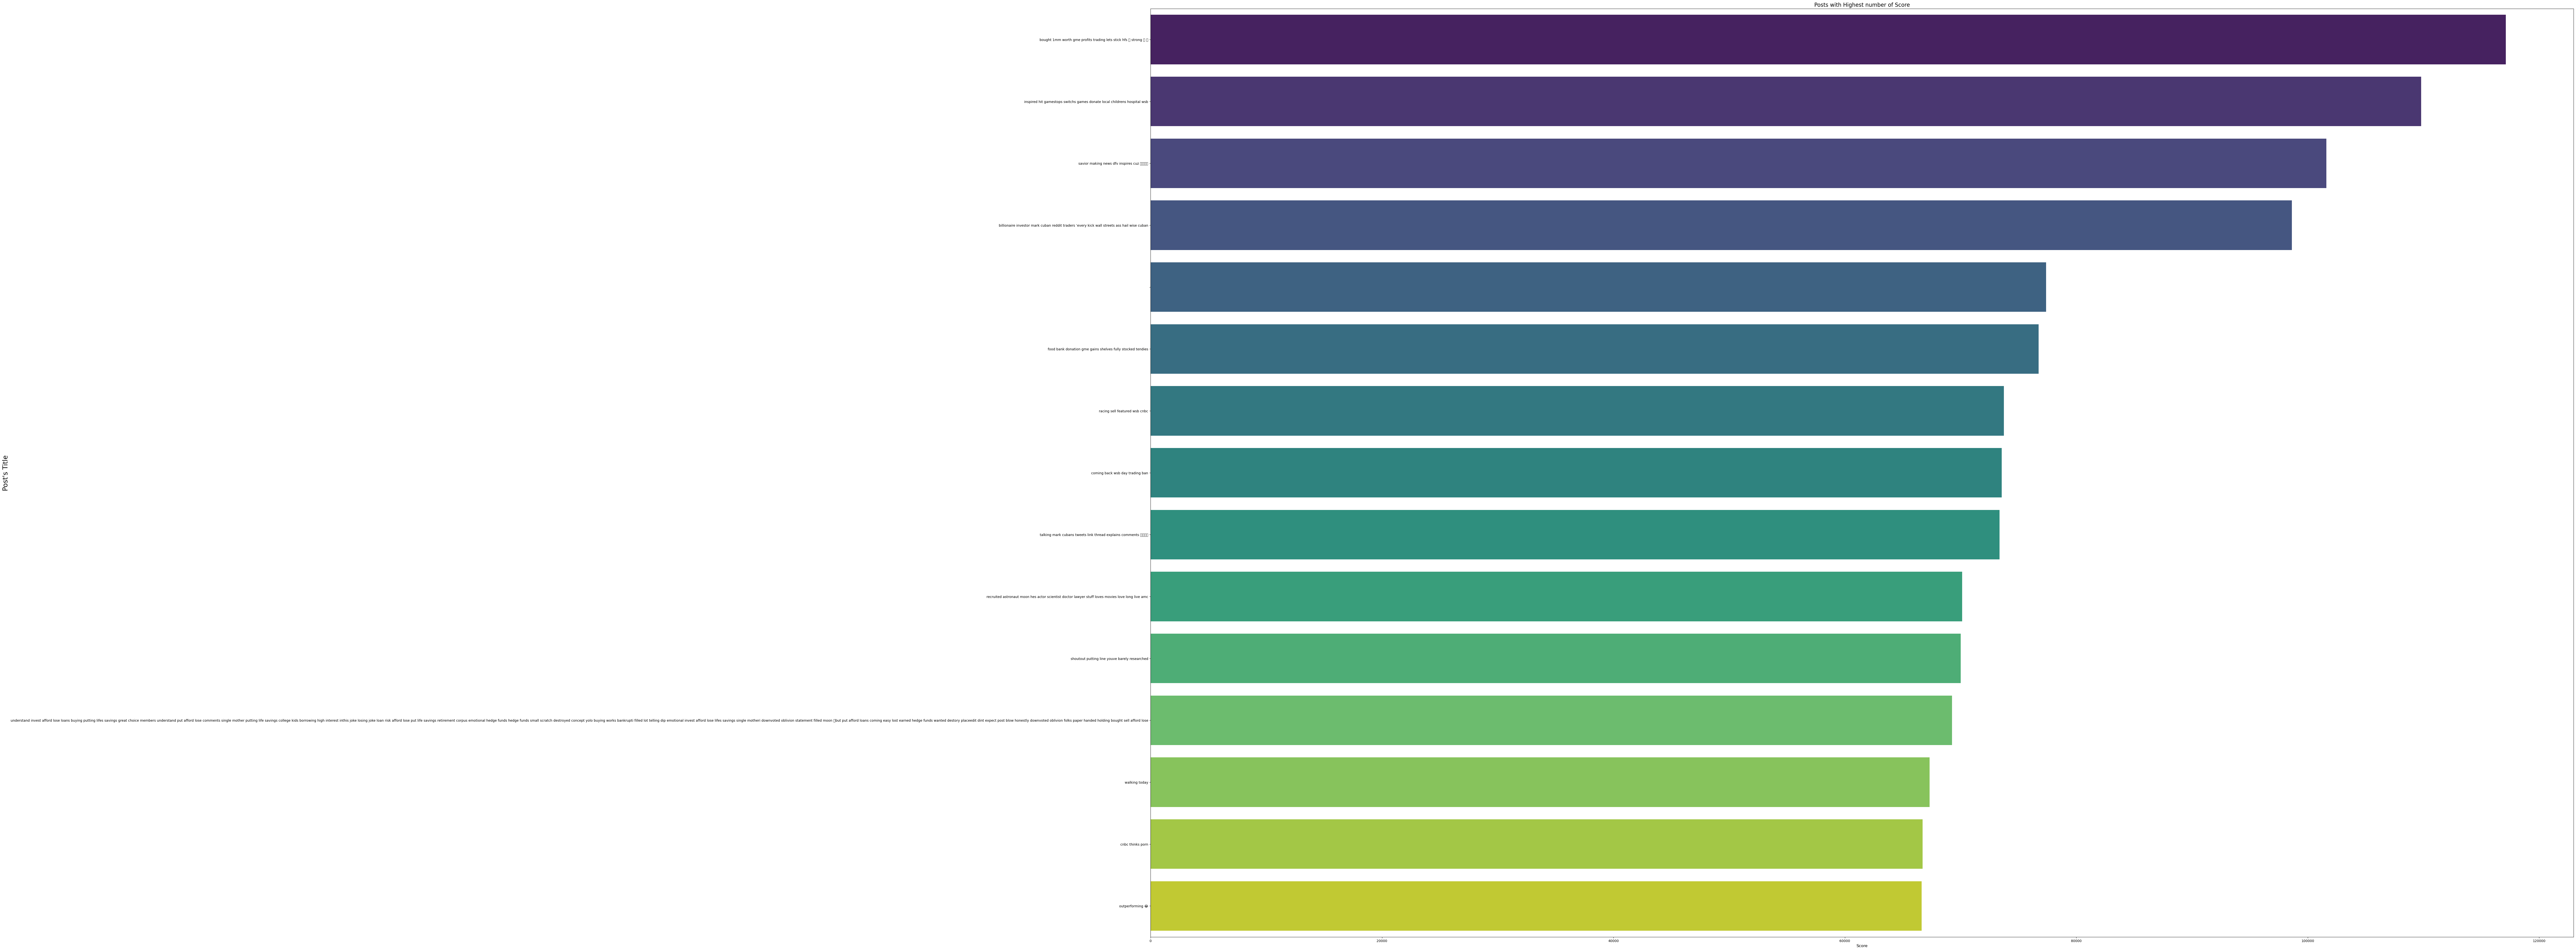

In [366]:
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap
data_score = the_df.sort_values('Score', ascending=False).head(15)
# Wrap long text titles for y-axis
data_score['wrapped_text'] = data_score['lemma_cleaned_text'].apply(lambda x: '\n'.join(textwrap.wrap(x, width=10)))
plt.figure(figsize=(10, 50))
plt.subplots_adjust(left=-5) 
plt.title("Posts with Highest number of Score", fontsize=16)
sns.barplot(y=data_score['lemma_cleaned_text'], x=data_score['Score'], palette="viridis")
plt.xlabel('Score', fontsize=12)
plt.ylabel("Post's Title", fontsize=20)
plt.yticks(fontsize=10)
plt.show()

Let's check that more number of Comments results more score or not i.e, does these factors relates each other. For this I'll first find the correlation mactrix of columns than plot a heatmap.

In [367]:
import plotly.express as px
import pandas as pd

# ***IMPORTANT: Sort the DataFrame by date***
the_dff = the_df.sort_values('date')

fig = px.line(the_dff, 
              x='date', 
              y='Score', 
              range_x=['2021-07-01', '2024-12-31'],  # Optional range restriction
              title='Time Series with Rangeslider',
              template='plotly_dark')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [368]:
#sentiment count: 
the_df['Text_sentiment_x'].value_counts()

Text_sentiment_x
Negative    82
Positive    69
Neutral     49
Name: count, dtype: int64

In [369]:
temp = the_df.groupby('Text_sentiment_x').count()['Text_x'].reset_index().sort_values(by='Text_x',ascending=False)
temp.style.background_gradient(cmap='Purples')

In [370]:
from plotly import graph_objs as go

fig = go.Figure(go.Funnelarea(
    text =temp.Text_sentiment_x,
    values = temp.Text_x,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
 ))

fig.update_layout(width=800,   height=600 ,template="plotly_dark" )
fig.show()

In [371]:
THE_DF = the_df

In [372]:
the_df.head()

Author  Score  Comment Count  \
0     RandomInvestor98  31906           1644   
1  Sad_Nefariousness10  29016          11819   
2  Efficient_Deer_8605  12336           1351   
3               sco-go  14514           1089   
4   Suspicious-Bad4703  11757           1014   

                                              Text_x Text_sentiment_x  \
0  Nancy Pelosi’s husband sold more than $500K wo...         Positive   
1  I bought $700k worth of Intel stock today  htt...         Positive   
2  I bought $700k worth of Intel stock I like the...         Positive   
3  To the guy who spent his 700k inheritance on I...          Neutral   
4                      Japanese Stocks are Crashing           Neutral   

                                        cleaned_text  \
0  nancy pelosis husband sold 500k worth visa sto...   
1  bought 700k worth intel stock today tldr grand...   
2       bought 700k worth intel stock stock cheap rn   
3           guy spent 700k inheritance intel bullish   
4                           japanese stocks crashing   

                                             cc_text  \
0  nancy pelosis husband sold 500k worth visa — w...   
1  bought 700k worth today tldr grandma died mont...   
2                         bought 700k worth cheap rn   
3                 guy spent 700k inheritance bullish   
4                                  japanese crashing   

                                  lemma_cleaned_text  year  month  day  hour  \
0  nancy pelosis husband sold 500k worth visa — w...  2024      9   26    11   
1  bought 700k worth today tldr grandma died mont...  2024      8    1    21   
2                         bought 700k worth cheap rn  2024      8   13    19   
3                 guy spent 700k inheritance bullish  2024      8    3    22   
4                                  japanese crashing  2024      8    5     6   

         date  
0  2024-09-26  
1  2024-08-01  
2  2024-08-13  
3  2024-08-03  
4  2024-08-05

In [373]:
the_df.columns

Index(['Author', 'Score', 'Comment Count', 'Text_x', 'Text_sentiment_x',
       'cleaned_text', 'cc_text', 'lemma_cleaned_text', 'year', 'month', 'day',
       'hour', 'date'],
      dtype='object')

In [374]:
the_df =the_df.drop(columns=['Text_x','cleaned_text', 'cc_text' ,'year',	'month',	'day',	'hour',	'date'])

In [375]:
the_df.head()

Author  Score  Comment Count Text_sentiment_x  \
0     RandomInvestor98  31906           1644         Positive   
1  Sad_Nefariousness10  29016          11819         Positive   
2  Efficient_Deer_8605  12336           1351         Positive   
3               sco-go  14514           1089          Neutral   
4   Suspicious-Bad4703  11757           1014          Neutral   

                                  lemma_cleaned_text  
0  nancy pelosis husband sold 500k worth visa — w...  
1  bought 700k worth today tldr grandma died mont...  
2                         bought 700k worth cheap rn  
3                 guy spent 700k inheritance bullish  
4                                  japanese crashing

In [376]:
dt=the_df

## VEDAR Analysis
( Valence Aware Dictionary for Sentiment Reasoning) 

In [377]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Prepare Vader sentiment analyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91829\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [378]:
# Map sentiment labels to numeric values
sentiment_mapping = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
dt['Text_sentiment_numeric'] = dt['Text_sentiment_x'].map(sentiment_mapping)

# Predict sentiment with Vader classifier
dt['Vader_Scores'] = dt['lemma_cleaned_text'].apply(lambda score: sid.polarity_scores(score)['compound'])
dt['Vader_Prediction'] = dt['Vader_Scores'].apply(lambda score: 1 if score >=0 else -1)

# Print Vader sentiment accuracy
print('Vader Accuracy:', round((len(dt[dt['Text_sentiment_numeric']==dt['Vader_Prediction']])/len(dt)) *100, 2), '%', '\n')


Vader Accuracy: 58.0 % 



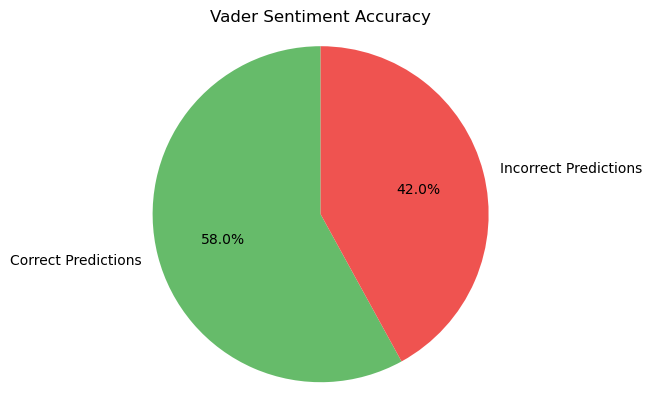

In [379]:
# Plot Vader sentiment accuracy
import matplotlib.pyplot as plt
labels = ['Correct Predictions', 'Incorrect Predictions']
sizes = [len(dt[dt['Text_sentiment_numeric'] == dt['Vader_Prediction']]), len(dt[dt['Text_sentiment_numeric'] != dt['Vader_Prediction']])]
colors = ['#66BB6A', '#EF5350']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.title('Vader Sentiment Accuracy')
plt.show()

compound as a separate column and all values greater than zeroes will be considered a positive review and all values less than zero would be considered as a negative review.

In [380]:
# Replace 'df' with the name of your dataframe
dt.to_csv('data.csv', index=False) 

### Key take-aways

> Adds two new columns to the DataFrame <br>
> <u>vader_score:</u>   The compound score from VADER <br>
> <u>vader_sentiment:</u>   The categorical sentiment<br>
> The conversion of sentoment to numerical is done for both original sentiments and VADER predictions.<br>
> <u>Compound Score:</u> A normalized score between -1 (most negative) and 1 (most positive). Computed by summing the valence scores of each word in the text
> <u>Valence score:</u> The measure of the emotional positivity or negativity of a word

In [381]:
dt.head()

Author  Score  Comment Count Text_sentiment_x  \
0     RandomInvestor98  31906           1644         Positive   
1  Sad_Nefariousness10  29016          11819         Positive   
2  Efficient_Deer_8605  12336           1351         Positive   
3               sco-go  14514           1089          Neutral   
4   Suspicious-Bad4703  11757           1014          Neutral   

                                  lemma_cleaned_text  Text_sentiment_numeric  \
0  nancy pelosis husband sold 500k worth visa — w...                       1   
1  bought 700k worth today tldr grandma died mont...                       1   
2                         bought 700k worth cheap rn                       1   
3                 guy spent 700k inheritance bullish                       0   
4                                  japanese crashing                       0   

   Vader_Scores  Vader_Prediction  
0        0.0000                 1  
1        0.7717                 1  
2        0.2263                 1  
3        0.0000                 1  
4        0.0000                 1

# Naive Bayes classifier


In [382]:
import numpy as np
import pandas as pd
import json, nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

%matplotlib inline

In [383]:
# Assuming df is your DataFrame and you want to rename a column
dt = dt.rename(columns={'lemma_cleaned_text': 'text'})


In [384]:
dt

Author  Score  Comment Count Text_sentiment_x  \
0        RandomInvestor98  31906           1644         Positive   
1     Sad_Nefariousness10  29016          11819         Positive   
2     Efficient_Deer_8605  12336           1351         Positive   
3                  sco-go  14514           1089          Neutral   
4      Suspicious-Bad4703  11757           1014          Neutral   
..                    ...    ...            ...              ...   
195      AtmosphereNo6743   3667            277         Negative   
196              Noobmode   1582            405          Neutral   
197             superanth  98626           1377         Positive   
198  B3stAuD1t0rofA11tiME   3214            515         Negative   
199              Slyver12  28096           2124         Positive   

                                                  text  \
0    nancy pelosis husband sold 500k worth visa — w...   
1    bought 700k worth today tldr grandma died mont...   
2                           bought 700k worth cheap rn   
3                   guy spent 700k inheritance bullish   
4                                    japanese crashing   
..                                                 ...   
195      snapchat founders lose billions violent crash   
196               txse texas exchange announced yeehaw   
197  billionaire investor mark cuban reddit traders...   
198  dumb movie lost 15m sony post losses wsb surpr...   
199  gme worry god gme cents hedgies cover shorts 3...   

     Text_sentiment_numeric  Vader_Scores  Vader_Prediction  
0                         1        0.0000                 1  
1                         1        0.7717                 1  
2                         1        0.2263                 1  
3                         0        0.0000                 1  
4                         0        0.0000                 1  
..                      ...           ...               ...  
195                      -1       -0.8519                -1  
196                       0        0.0000                 1  
197                       1       -0.0258                -1  
198                      -1       -0.9517                -1  
199                       1       -0.9872                -1  

[200 rows x 8 columns]

In [385]:
# Replace empty strings with a neutral sentiment or placeholder text
dt['text'] = dt['text'].replace('', 'No sentiment available')  # Example placeholder


### Tokenization


In [386]:
tokenized_review=dt['text'].apply(lambda x: x.split())
tokenized_review.head(5)

0    [nancy, pelosis, husband, sold, 500k, worth, v...
1    [bought, 700k, worth, today, tldr, grandma, di...
2                     [bought, 700k, worth, cheap, rn]
3             [guy, spent, 700k, inheritance, bullish]
4                                 [japanese, crashing]
Name: text, dtype: object

### count vectorizer

In [387]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# token = RegexpTokenizer(r'[a-zA-Z0-9-_]+')
# cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
# text_counts = cv.fit_transform(dt['text'])

# Update tokenizer to include '-' and '_'
token = RegexpTokenizer(r'[a-zA-Z0-9-_]+')

# Custom preprocessing function to handle sequences like '__D__a__n__i__e__l__'
def custom_preprocessor(text):
    # Remove sequences like '__D__a__n__i__e__l__'
    text = re.sub(r'_+', '_', text)  # Replace repeated underscores with a single one
    text = re.sub(r'\b[_-]+|[_-]+\b', '', text)  # Remove leading or trailing underscores/hyphens from words
    return text

# Initialize CountVectorizer with the updated tokenizer and preprocessing
cv = CountVectorizer(stop_words='english', ngram_range=(1, 1), tokenizer=token.tokenize, preprocessor=custom_preprocessor)

# Transform the text data
text_counts = cv.fit_transform(dt['text'])


c:\Users\91829\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



# TF-IDF

In [388]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_count_2 = tfidf.fit_transform(dt['text'])

In [389]:
#splitting the data in test and training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(text_count_2, dt['Vader_Prediction'],test_size=0.20,random_state=30)

In [390]:
# from sklearn.model_selection import train_test_split
# X=text_counts
# y=dt['Vader_Prediction']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [391]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

CNB = ComplementNB(alpha = 0.0)
CNB.fit(x_train, y_train)

predictions = CNB.predict(x_test)
accuracy_score_cnb = metrics.accuracy_score(CNB.predict(x_test), y_test)
# Calculate and print accuracy
# accuracy = accuracy_score(y_test, predictions)
#print(f'Accuracy: {round(accuracy * 100, 2)}%')

print('accuracy_score_cnb = '+str('{:4.2f}'.format(accuracy_score_cnb*100))+'%')
# print the classification report and confusion matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

 


accuracy_score_cnb = 35.00%
              precision    recall  f1-score   support

          -1       0.32      1.00      0.48        12
           1       1.00      0.07      0.13        28

    accuracy                           0.35        40
   macro avg       0.66      0.54      0.31        40
weighted avg       0.79      0.35      0.24        40

[[12  0]
 [26  2]]


c:\Users\91829\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:1035: RuntimeWarning:

divide by zero encountered in log



In [392]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB( alpha= 0.0 , fit_prior= False)
MNB.fit(x_train, y_train)

predictions = MNB.predict(x_test)
accuracy_score_mnb = metrics.accuracy_score(MNB.predict(x_test), y_test)
# Calculate and print accuracy
# accuracy = accuracy_score(y_test, predictions)
#print(f'Accuracy: {round(accuracy * 100, 2)}%')
print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')

# Optionally, print the classification report and confusion matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

accuracy_score_mnb = 35.00%
              precision    recall  f1-score   support

          -1       0.32      1.00      0.48        12
           1       1.00      0.07      0.13        28

    accuracy                           0.35        40
   macro avg       0.66      0.54      0.31        40
weighted avg       0.79      0.35      0.24        40

[[12  0]
 [26  2]]


c:\Users\91829\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:890: RuntimeWarning:

divide by zero encountered in log



In [393]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(x_train, y_train)

predictions = BNB.predict(x_test)

accuracy_score_bnb = metrics.accuracy_score(BNB.predict(x_test), y_test)
# Calculate and print accuracy
# accuracy = accuracy_score(y_test, predictions)
#print(f'Accuracy: {round(accuracy * 100, 2)}%')
print('accuracy_score_bnb = '+str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')


# Optionally, print the classification report and confusion matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


accuracy_score_bnb = 70.00%
              precision    recall  f1-score   support

          -1       0.50      0.33      0.40        12
           1       0.75      0.86      0.80        28

    accuracy                           0.70        40
   macro avg       0.62      0.60      0.60        40
weighted avg       0.68      0.70      0.68        40

[[ 4  8]
 [ 4 24]]


# TF-IDF

In [394]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf = TfidfVectorizer()
# text_count_2 = tfidf.fit_transform(dt['text'])

In [395]:
#splitting the data in test and training
#from sklearn.model_selection() import train_test_split()
# x_train, x_test, y_train, y_test = train_test_split(text_count_2, dt['Vader_Prediction'],test_size=0.20,random_state=30)

In [396]:
# from sklearn.metrics import accuracy_score
# # from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# from sklearn import metrics

# #fitting the model with BNB
# BNB.fit(x_train, y_train)
# accuracy_score_bnb = metrics.accuracy_score(BNB.predict(x_test), y_test)
# print('accuracy_score_bnb = '+str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')

# print(classification_report(y_test, predictions))
# print(confusion_matrix(y_test, predictions))


In [397]:
# # # fitting the model with CNB
# CNB.fit(x_train, y_train)
# accuracy_score_cnb = metrics.accuracy_score(CNB.predict(x_test), y_test)
# print('accuracy_score_cnb = '+str('{:4.2f}'.format(accuracy_score_cnb*100))+'%')

In [398]:
# #fitting the model with MNB
# MNB.fit(x_train, y_train)
# accuracy_score_mnb = metrics.accuracy_score(MNB.predict(x_test), y_test)

# print('accuracy_score_mnb = '+str('{:4.2f}'.format(accuracy_score_mnb*100))+'%')

# Text-Blob

TextBlob returns polarity and subjectivity of a sentence. 

Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment. TextBlob has semantic labels that help with fine-grained analysis.

Subjectivity lies between [0,1]. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information

In [399]:
# from textblob import TextBlob
# # Step 1: Define function to extract polarity and subjectivity
# def get_sentiment(text):
#     blob = TextBlob(text)
#     return blob.sentiment.polarity, blob.sentiment.subjectivity

# # Step 2: Apply the sentiment function to the 'text' column
# dt[['polarity', 'subjectivity']] = dt['text'].apply(lambda text: pd.Series(get_sentiment(text)))

# # Step 3: Function to convert polarity into categorical sentiment
# def categorize_sentiment(polarity):
#     if polarity > 1:
#         return 1  # Positive sentiment
#     elif polarity == 0:
#         return 0  # Neutral sentiment
#     else:
#         return -1  # Negative sentiment

# # Step 4: Apply the categorization function to the polarity column
# dt['predicted_sentiment'] = dt['polarity'].apply(categorize_sentiment)

# # Step 5: Calculate accuracy by comparing predicted sentiment to true sentiment
# correct_predictions = sum(dt['predicted_sentiment'] == dt['Text_sentiment_numeric'])
# accuracy = correct_predictions / len(dt) * 100
# # Step 6: Display the DataFrame with polarity, subjectivity, predicted sentiment, and accuracy
# (dt[['text', 'polarity', 'subjectivity', 'predicted_sentiment', 'Text_sentiment_numeric']].head())
# print(f"\nAccuracy of TextBlob Sentiment Analysis: {accuracy:.2f}%")

In [400]:
from textblob import TextBlob
from nltk.tokenize import word_tokenize
# text = dt['text']
# blob = TextBlob(text)
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [401]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [402]:
dt['text'] = dt['text'].apply(lambda x: stemming(x))

In [403]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [404]:
dt['polarity'] = dt['text'].apply(polarity)

In [405]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [406]:
dt['sentiment'] = dt['polarity'].apply(sentiment)

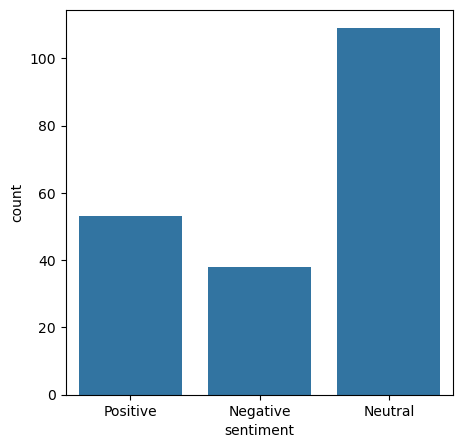

In [407]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = dt)
plt.show()

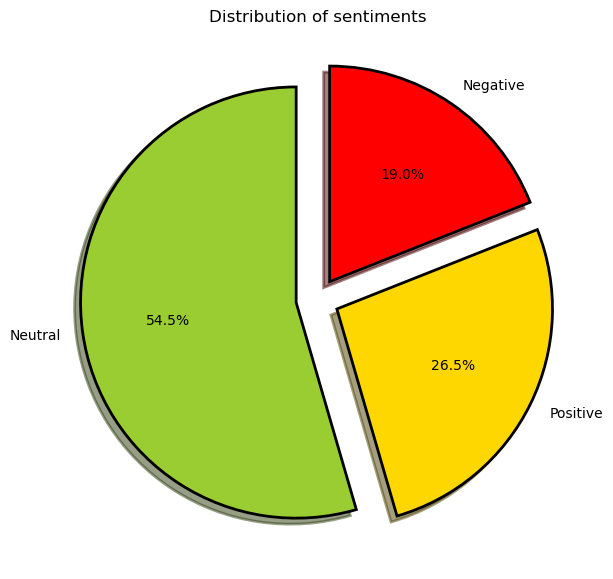

In [408]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = dt['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')
plt.show()

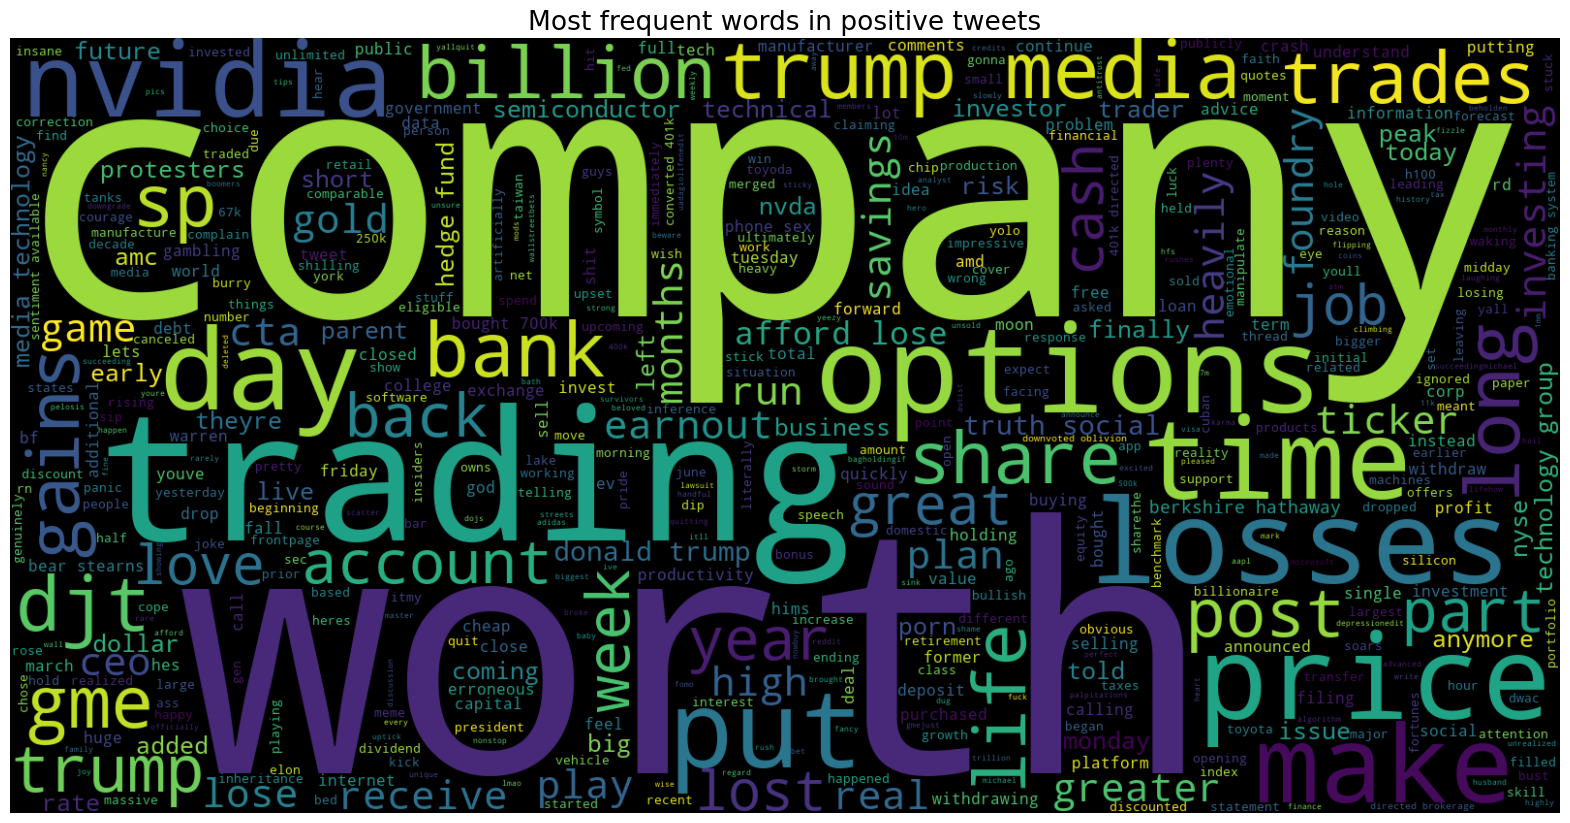

In [409]:
pos_tweets = dt[dt.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["amp"])

# Generate a word cloud image

wordcloud = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=1600, height=800).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

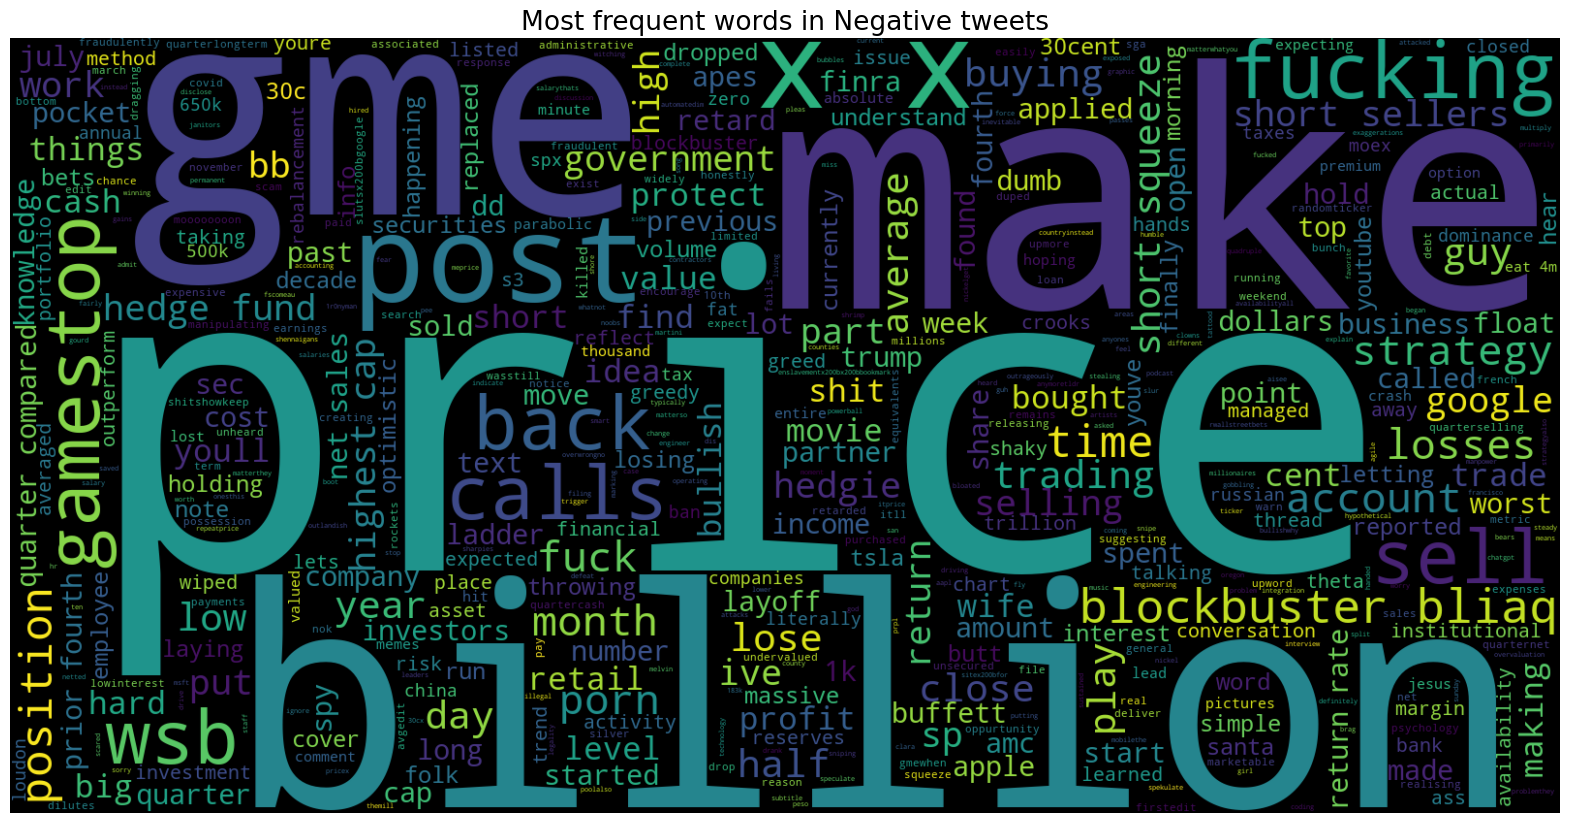

In [410]:
neg_tweets = dt[dt.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["amp"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=1600, height=800).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Negative tweets', fontsize=19)
plt.show()

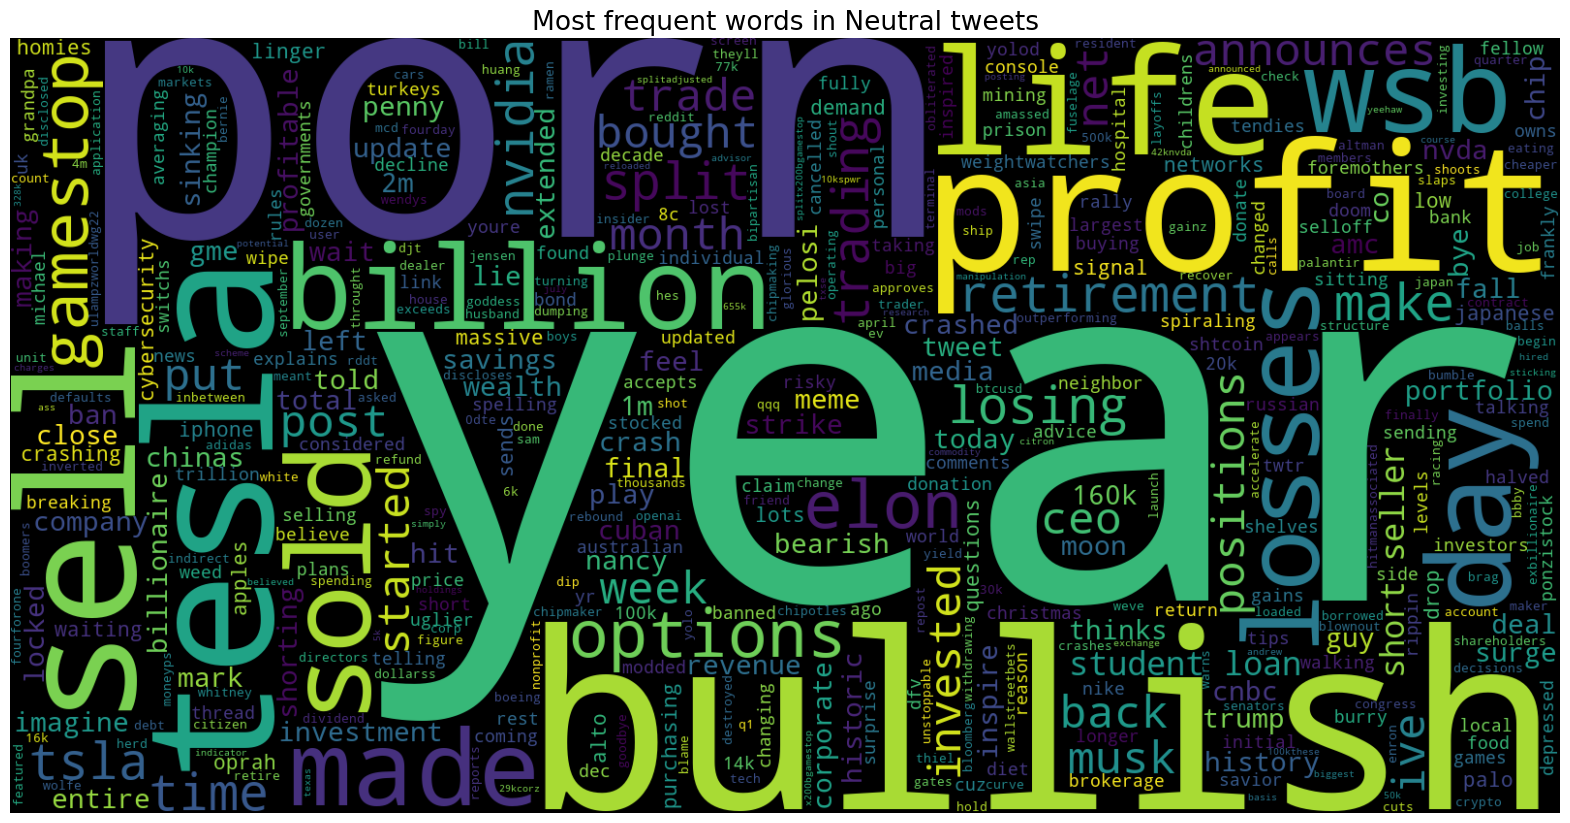

In [411]:
neutral_tweets = dt[dt.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["amp"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=1600, height=800).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Neutral tweets', fontsize=19)
plt.show()

In [412]:
dt

Author  Score  Comment Count Text_sentiment_x  \
0        RandomInvestor98  31906           1644         Positive   
1     Sad_Nefariousness10  29016          11819         Positive   
2     Efficient_Deer_8605  12336           1351         Positive   
3                  sco-go  14514           1089          Neutral   
4      Suspicious-Bad4703  11757           1014          Neutral   
..                    ...    ...            ...              ...   
195      AtmosphereNo6743   3667            277         Negative   
196              Noobmode   1582            405          Neutral   
197             superanth  98626           1377         Positive   
198  B3stAuD1t0rofA11tiME   3214            515         Negative   
199              Slyver12  28096           2124         Positive   

                                                  text  \
0    nancy pelosis husband sold 500k worth visa — w...   
1    bought 700k worth today tldr grandma died mont...   
2                           bought 700k worth cheap rn   
3                   guy spent 700k inheritance bullish   
4                                    japanese crashing   
..                                                 ...   
195      snapchat founders lose billions violent crash   
196               txse texas exchange announced yeehaw   
197  billionaire investor mark cuban reddit traders...   
198  dumb movie lost 15m sony post losses wsb surpr...   
199  gme worry god gme cents hedgies cover shorts 3...   

     Text_sentiment_numeric  Vader_Scores  Vader_Prediction  polarity  \
0                         1        0.0000                 1  0.300000   
1                         1        0.7717                 1  0.102262   
2                         1        0.2263                 1  0.350000   
3                         0        0.0000                 1 -0.100000   
4                         0        0.0000                 1  0.000000   
..                      ...           ...               ...       ...   
195                      -1       -0.8519                -1 -0.800000   
196                       0        0.0000                 1  0.000000   
197                       1       -0.0258                -1  0.700000   
198                      -1       -0.9517                -1 -0.415000   
199                       1       -0.9872                -1 -0.054835   

    sentiment  
0    Positive  
1    Positive  
2    Positive  
3    Negative  
4     Neutral  
..        ...  
195  Negative  
196   Neutral  
197  Positive  
198  Negative  
199  Negative  

[200 rows x 10 columns]

### Sentimental Analysis using SentiWordNet

SentiWordNet is a valuable resource for sentiment analysis, especially in cases where understanding the sentiment conveyed by individual words is essential. <br>
SentiWordNet’s integration with WordNet adds depth to the analysis by considering word relationships and context.

In [413]:
from nltk.corpus import sentiwordnet as swn

In [414]:
swn_df = dt
swn_df

#Edits After Removing Stopwords
Edited_text = dt['text'].copy()
swn_df['text_without_stopwords'] = Edited_text

Text Data Preprocessing and Stopword Removal Functions

In [415]:
def preprocess_text_data(swn_df,text):
    # Proprocessing the data
    swn_df[text]=swn_df[text].str.lower()
    # Code to remove the Hashtags from the text
    swn_df[text]=swn_df[text].apply(lambda x:re.sub(r'\B#\S+','',x))
    # Code to remove the links from the text
    swn_df[text]=swn_df[text].apply(lambda x:re.sub(r"http\S+", "", x))
    # Code to remove the Special characters from the text 
    swn_df[text]=swn_df[text].apply(lambda x:' '.join(re.findall(r'\w+', x)))
    # Code to substitute the multiple spaces with single spaces
    swn_df[text]=swn_df[text].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
    
     # Code to remove all the single characters in the text
    swn_df[text]=swn_df[text].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
    # Remove the twitter handlers
    swn_df[text]=swn_df[text].apply(lambda x:re.sub('@[^\s]+','',x))

# Function to tokenize and remove the stopwords    
def rem_stopwords_tokenize(swn_df,text):
      
    def getting(sen):
        example_sent = sen
        
        filtered_sentence = [] 

        stop_words = set(stopwords.words('english')) 

        word_tokens = word_tokenize(example_sent) 
        
        filtered_sentence = [w for w in word_tokens if not w in stop_words]
        return filtered_sentence
    # Using "getting(sen)" function to append edited sentence to data
    x=[]
    for i in swn_df[text].values:
        x.append(getting(i))
    swn_df[text]=x

<>:16: SyntaxWarning:

invalid escape sequence '\s'

<>:16: SyntaxWarning:

invalid escape sequence '\s'

C:\Users\91829\AppData\Local\Temp\ipykernel_40600\1778511940.py:16: SyntaxWarning:

invalid escape sequence '\s'



Text Lemmatization and Cleaning Function

In [416]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def Lemmatization(swn_df,text):
    def getting2(sen):
        
        example = sen
        output_sentence =[]
        word_tokens2 = word_tokenize(example)
        lemmatized_output = [lemmatizer.lemmatize(w) for w in word_tokens2]
        
        # Remove characters which have length less than 2  
        without_single_chr = [word for word in lemmatized_output if len(word) > 2]
        # Remove numbers
        cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]
        
        return cleaned_data_title

Removing Stopwords and Tokenizing Text Data

In [417]:
def rem_stopwords_tokenize(swn_df,text):
      
    def getting(sen):
        example_sent = sen
        
        filtered_sentence = [] 

        stop_words = set(stopwords.words('english')) 

        word_tokens = word_tokenize(example_sent) 
        
        filtered_sentence = [w for w in word_tokens if not w in stop_words] 
        
        return filtered_sentence
    # Using "getting(sen)" function to append edited sentence to data
    x=[]
    for i in swn_df[text].values:
        x.append(getting(i))
    swn_df[text]=x

Lemmatization and Text Cleaning Function

In [418]:
lemmatizer = WordNetLemmatizer()
def Lemmatization(swn_df,text):
    def getting2(sen):
        
        example = sen
        output_sentence =[]
        word_tokens2 = word_tokenize(example)
        lemmatized_output = [lemmatizer.lemmatize(w) for w in word_tokens2]
        
        # Remove characters which have length less than 2  
        without_single_chr = [word for word in lemmatized_output if len(word) > 2]
        # Remove numbers
        cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]
        return cleaned_data_title
    # Using "getting2(sen)" function to append edited sentence to data
    x=[]
    for i in swn_df[text].values:
        x.append(getting2(i))
    swn_df[text]=x

Reconstructing Sentences from Tokenized Text Data

In [419]:
def make_sentences(swn_df,text):
    swn_df[text]=swn_df[text].apply(lambda x:' '.join([i+' ' for i in x]))
    # Removing double spaces if created
    swn_df[text]=swn_df[text].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

Text Data Preprocessing: Removing Stopwords, Tokenization, and Lemmatization

In [420]:
import nltk
nltk.download('punkt')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Using the preprocessing function to preprocess the data
preprocess_text_data(swn_df,'text_without_stopwords')

# Using tokenizer and removing the stopwords
rem_stopwords_tokenize(swn_df,'text_without_stopwords')
# Converting all the texts back to sentences
make_sentences(swn_df,'text_without_stopwords')

#Edits After Lemmatization
final_Edit = swn_df['text_without_stopwords'].copy()
swn_df["After_lemmatization"] = final_Edit

# Using the Lemmatization function to lemmatize the data
Lemmatization(swn_df,'After_lemmatization')
# Converting all the texts back to sentences
make_sentences(swn_df,'After_lemmatization')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91829\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Performing Sentiment Analysis with Sentiment WordNet (SentiWordNet)

In [421]:
from nltk.corpus import wordnet as wn
nltk.download('averaged_perceptron_tagger')
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

pos=neg=obj=count=0

postagging = []

for text in swn_df['After_lemmatization']:
    list = word_tokenize(text)
    postagging.append(nltk.pos_tag(list))

swn_df['pos_tags'] = postagging

def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None
# Returns list of pos-neg and objective score.
def get_sentiment(word,tag):
    wn_tag = penn_to_wn(tag)
    
    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        return []

    #Lemmatization
    lemma = lemmatizer.lemmatize(word, pos=wn_tag)
    if not lemma:
        return []
    
    #Synset is a special kind of a simple interface that is present in NLTK to look up words in WordNet. 
    #Synset instances are the groupings of synonymous words that express the same concept. 
    #Some of the words have only one Synset and some have several.

    synsets = wn.synsets(word, pos=wn_tag)
    if not synsets:
        return []

    # Take the first sense, the most common
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())

    return [synset.name(), swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]

    pos=neg=obj=count=0
    
senti_score = []

for pos_val in swn_df['pos_tags']:
    senti_val = [get_sentiment(x,y) for (x,y) in pos_val]
    for score in senti_val:
        try:
            pos = pos + score[1]  #positive score is stored at 2nd position
            neg = neg + score[2]  #negative score is stored at 3rd position
        except:
            continue
    senti_score.append(pos - neg)
    pos=neg=0    
    
swn_df['senti_score'] = senti_score
print(swn_df['senti_score'])

swn_df.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91829\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\91829\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


0      0.000
1      0.625
2      0.000
3      0.000
4      0.000
       ...  
195   -0.125
196    0.000
197    0.000
198   -0.125
199    0.875
Name: senti_score, Length: 200, dtype: float64


Author  Score  Comment Count Text_sentiment_x  \
0     RandomInvestor98  31906           1644         Positive   
1  Sad_Nefariousness10  29016          11819         Positive   
2  Efficient_Deer_8605  12336           1351         Positive   
3               sco-go  14514           1089          Neutral   
4   Suspicious-Bad4703  11757           1014          Neutral   

                                                text  Text_sentiment_numeric  \
0  nancy pelosis husband sold 500k worth visa — w...                       1   
1  bought 700k worth today tldr grandma died mont...                       1   
2                         bought 700k worth cheap rn                       1   
3                 guy spent 700k inheritance bullish                       0   
4                                  japanese crashing                       0   

   Vader_Scores  Vader_Prediction  polarity sentiment  \
0        0.0000                 1  0.300000  Positive   
1        0.7717                 1  0.102262  Positive   
2        0.2263                 1  0.350000  Positive   
3        0.0000                 1 -0.100000  Negative   
4        0.0000                 1  0.000000   Neutral   

                              text_without_stopwords  \
0  nancy pelosis husband sold 500k worth visa wee...   
1  bought 700k worth today tldr grandma died mont...   
2                        bought 700k worth cheap rn    
3                guy spent 700k inheritance bullish    
4                                 japanese crashing    

                                 After_lemmatization  \
0  nancy pelosis husband sold 500k worth visa wee...   
1  bought 700k worth today tldr grandma died mont...   
2                           bought 700k worth cheap    
3                guy spent 700k inheritance bullish    
4                                 japanese crashing    

                                            pos_tags  senti_score  
0  [(nancy, NN), (pelosis, NN), (husband, NN), (s...        0.000  
1  [(bought, VBD), (700k, CD), (worth, NN), (toda...        0.625  
2  [(bought, VBD), (700k, CD), (worth, NN), (chea...        0.000  
3  [(guy, NN), (spent, VBD), (700k, CD), (inherit...        0.000  
4                   [(japanese, JJ), (crashing, NN)]        0.000

Assigning Sentiment Labels Based on Sentiment Scores

In [422]:
swn_df['SENTIMENT']=''
swn_df.loc[swn_df.senti_score >= 0.05,'SENTIMENT']='POSITIVE'
swn_df.loc[swn_df.senti_score <= -0.05,'SENTIMENT']='NEGATIVE'
swn_df.loc[swn_df.senti_score == 0,'SENTIMENT']='NEUTRAL'
# swn_df.head()

Visualizing Sentiment Distribution in the Dataset

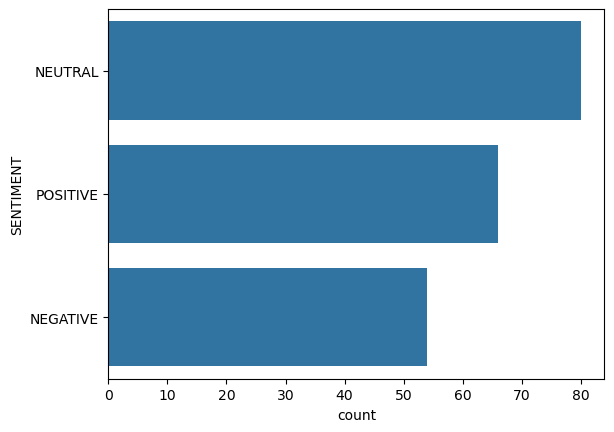

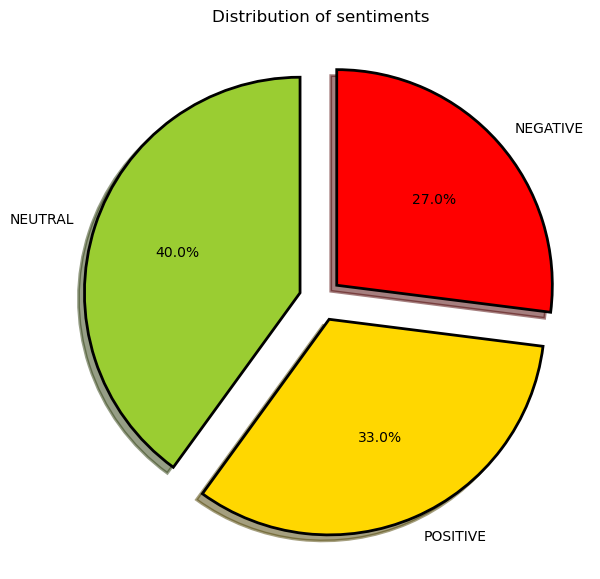

In [423]:
import seaborn as sns
sns.countplot(swn_df['SENTIMENT'])
plt.show()

#Pie chart
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = swn_df['SENTIMENT'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')
plt.show()

# Flair

In [424]:
!pip install flair

In [425]:
empty_strings_count = (dt['text'].str.strip() == '').sum()
print(f"Number of empty strings in 'text': {empty_strings_count}")


Number of empty strings in 'text': 0


In [426]:
# Replace empty strings with a neutral sentiment or placeholder text
dt['text'] = dt['text'].replace('', 'No sentiment available')  # Example placeholder


In [427]:
from flair.nn import Classifier
from flair.splitter import SegtokSentenceSplitter
import pandas as pd

# Initialize sentence splitter
splitter = SegtokSentenceSplitter()

# Load the NER model
tagger = Classifier.load('ner')

# Lists to hold predictions and true labels
predicted_labels = []
true_labels = []

# Iterate through each row in the DataFrame
for index, row in dt.iterrows():
    # Split the text into sentences
    sentences = splitter.split(row['text'])
    
    # Predict tags for sentences
    tagger.predict(sentences)
    
    # Process each sentence to determine predicted labels
    for sentence in sentences:
        entities = sentence.get_spans('ner')  # Get the predicted entities
        
        # Check for specific keywords to determine the predicted label
        if any(keyword in sentence.to_plain_string() for keyword in ['Purchased', 'buy', 'good', 'bought']):
            predicted_labels.append(1)  # Positive sentiment
        else:
            predicted_labels.append(0)  # Negative or neutral sentiment
    
    # Append the true sentiment label for this row
    true_labels.append(row['Text_sentiment_numeric'])

# Calculate accuracy
correct_predictions = sum(p == t for p, t in zip(predicted_labels, true_labels))
accuracy = correct_predictions / len(true_labels) * 100

# Add predicted labels to the DataFrame
dt['predicted_labels'] = predicted_labels

# Print the DataFrame with sentences, predicted, and true labels
print(dt[['text', 'predicted_labels', 'Text_sentiment_numeric']])

# Print the accuracy
print(f"\nAccuracy of Flair NER: {accuracy:.2f}%")


2024-10-11 21:14:08,295 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, S-ORG, S-MISC, B-PER, E-PER, S-LOC, B-ORG, E-ORG, I-PER, S-PER, B-MISC, I-MISC, E-MISC, I-ORG, B-LOC, E-LOC, I-LOC, <START>, <STOP>
                                                  text  predicted_labels  \
0    nancy pelosis husband sold 500k worth visa — w...                 0   
1    bought 700k worth today tldr grandma died mont...                 1   
2                           bought 700k worth cheap rn                 1   
3                   guy spent 700k inheritance bullish                 0   
4                                    japanese crashing                 0   
..                                                 ...               ...   
195      snapchat founders lose billions violent crash                 0   
196               txse texas exchange announced yeehaw                 0   
197  billionaire investor mark cuban reddit traders...                 0   
198  dumb movie lost 15m